In [15]:
import pandas as pd

# load the data
file_path = "credit_risk_dataset.csv"
data = pd.read_csv(file_path)

# display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y

Data Cleaning and Preprocessing. Identify and handle missing values and remove them (for now). Save the cleaned data to a new folder called 'data/processed/' folder

In [16]:
# handle missing values
data = data.dropna() # drop rows with missing values - might use different methods later on

# save the cleaned data
data.to_csv('cleaned_dataset.csv', index=False)

Performing EDA

In [17]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB
None
         person_age  person_inc

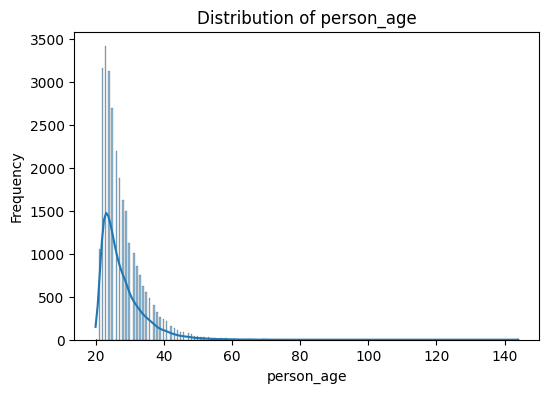

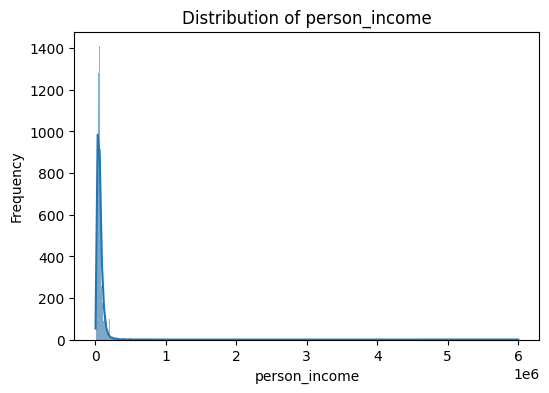

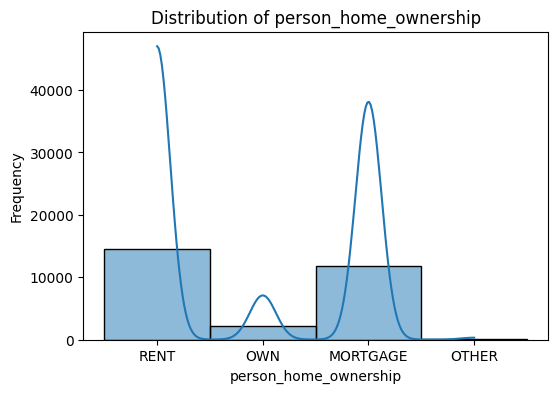

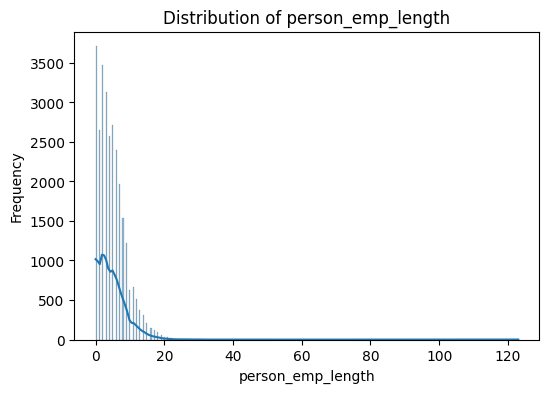

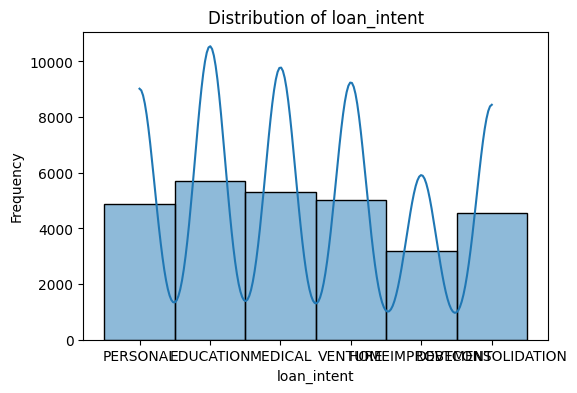

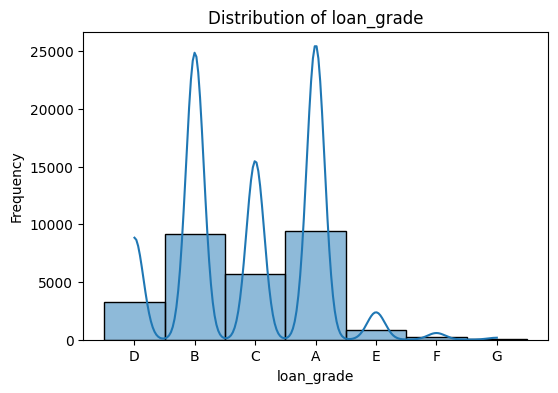

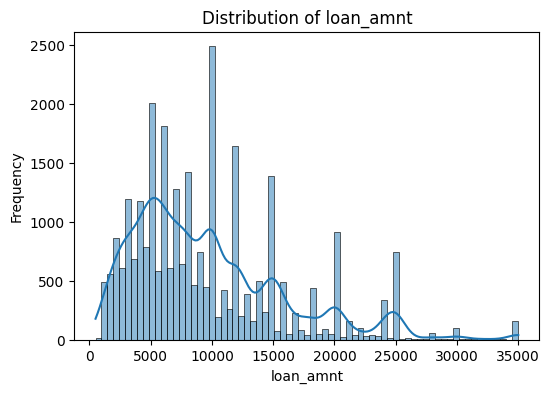

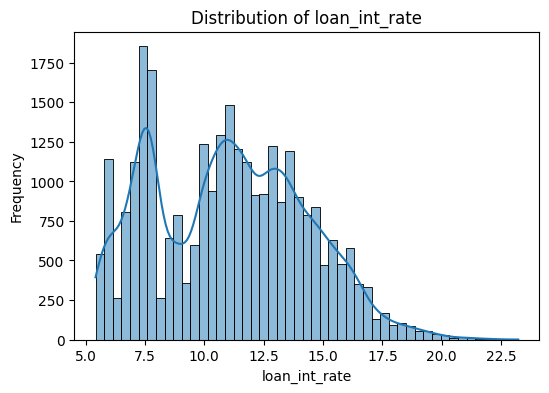

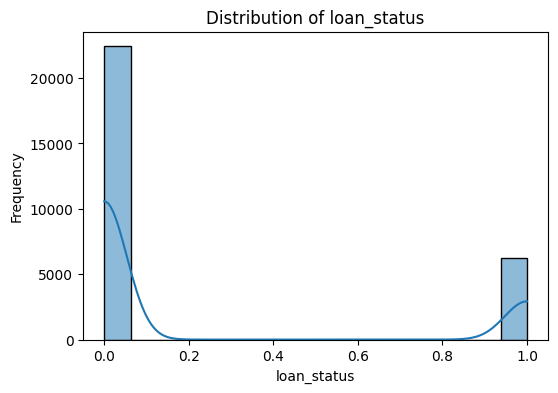

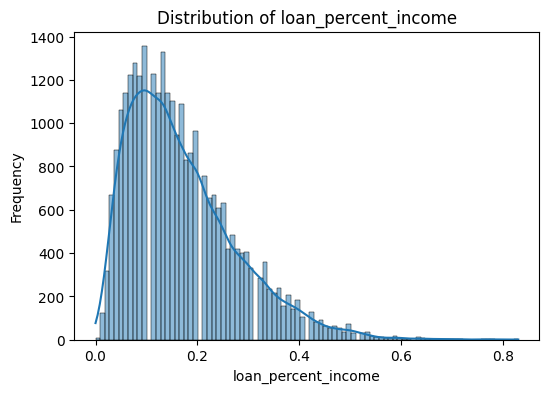

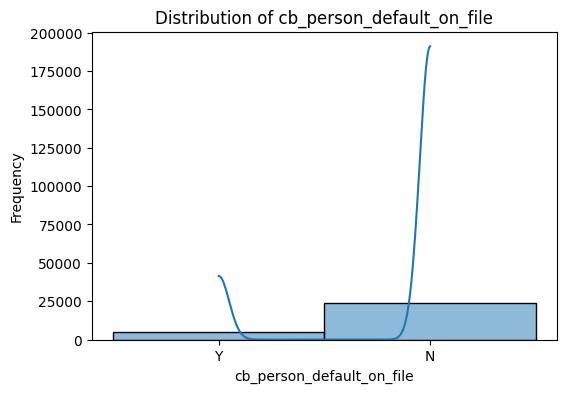

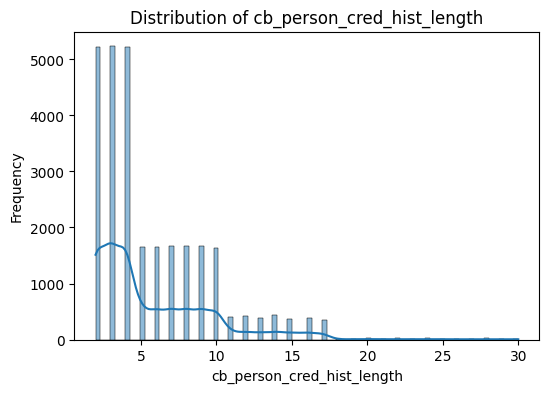

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# get the list of all columns (features) in the DataFrame
features = data.columns

# loop through each feature and visualize its distribution
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True) # create a histogram with Kernal Density Estimate
    plt.title(f'Distribution of {feature}') # set the title of each plot
    plt.xlabel(feature) # set the x-axis label
    plt.ylabel('Frequency') # set the y-axis label
    plt.show()  # display the plot




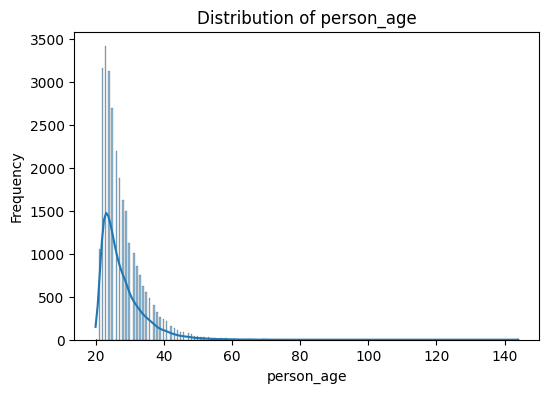

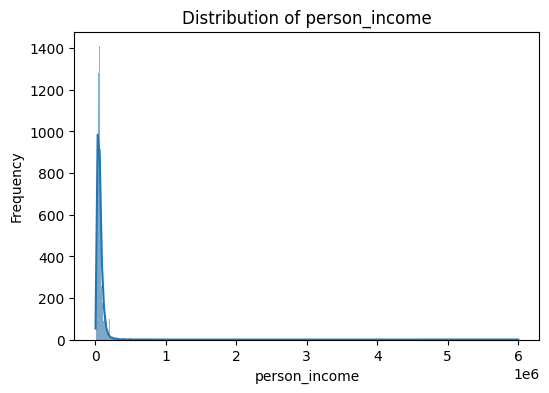

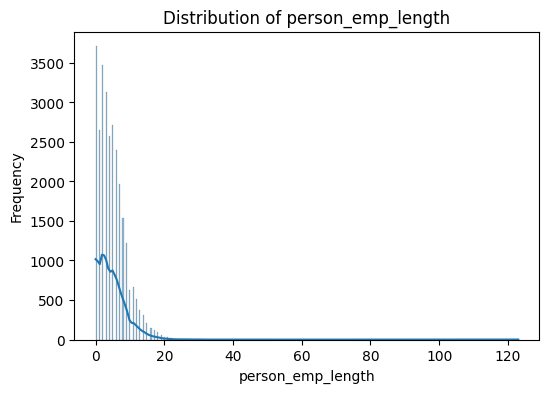

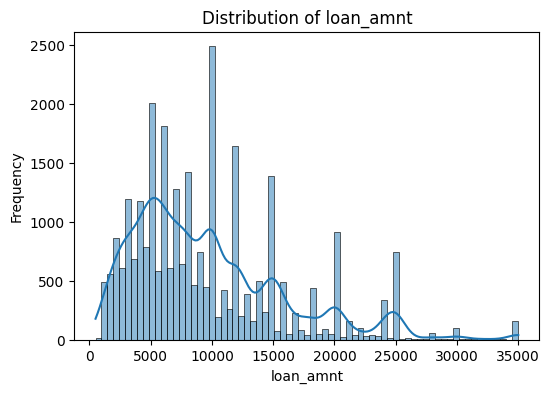

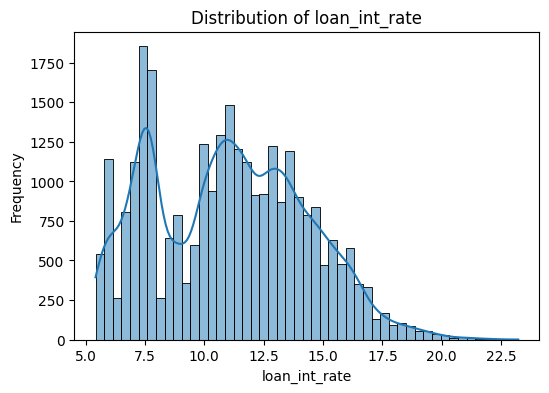

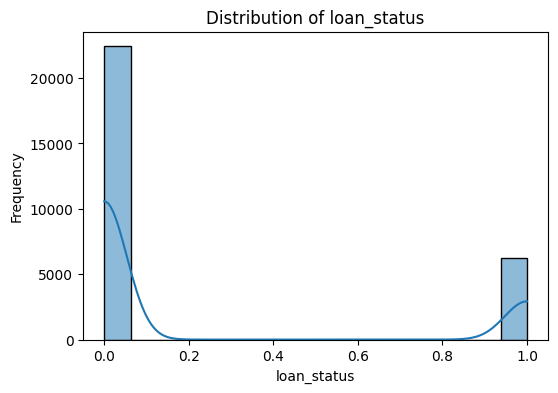

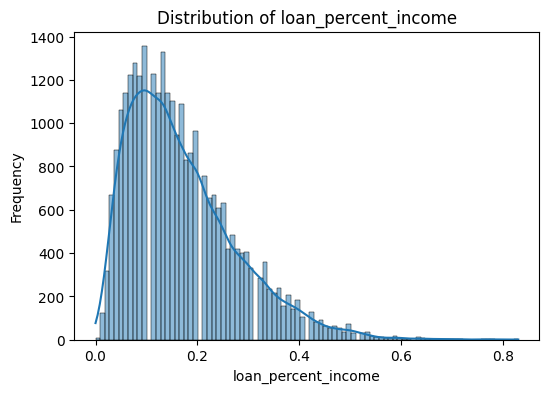

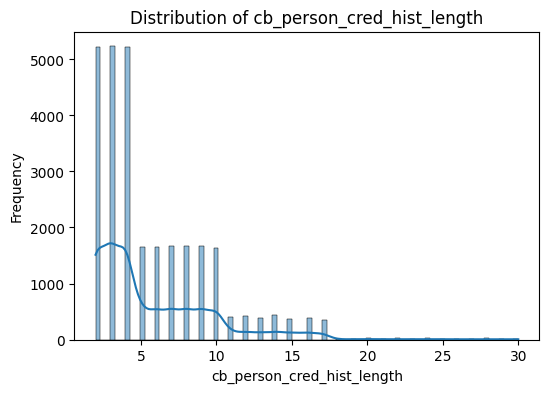

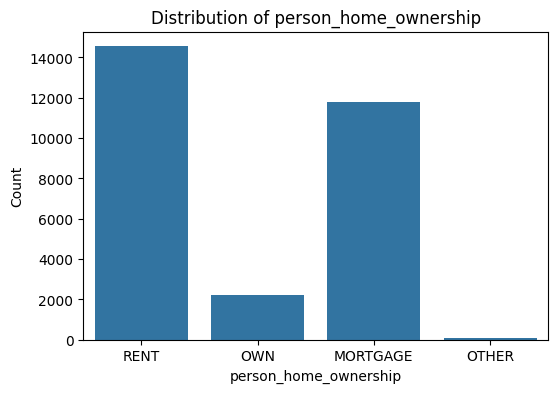

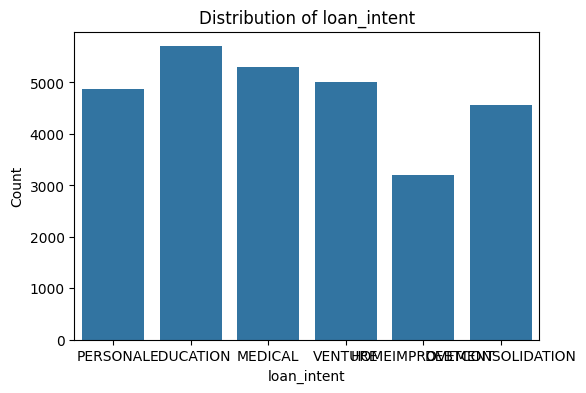

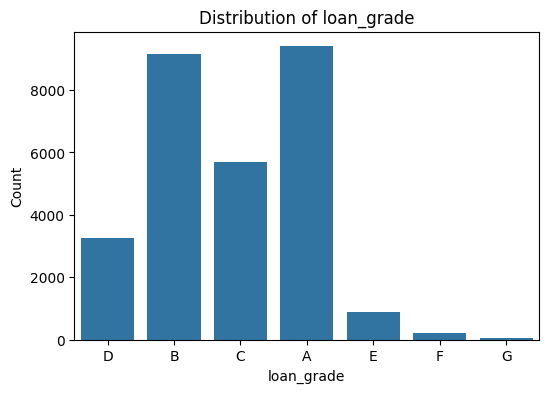

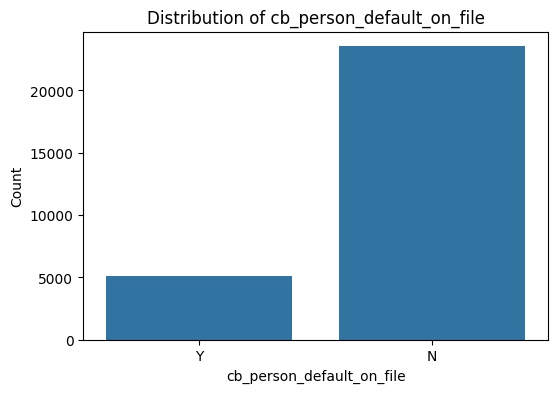

In [27]:
# seperate numerical and categorical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns

# visualize the numerical features
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True) # create a histogram with Kernal Density Estimate
    plt.title(f'Distribution of {feature}') # set the title of each plot
    plt.xlabel(feature) # set the x-axis label
    plt.ylabel('Frequency') # set the y-axis label
    plt.show()  # display the plot

# visualize categorical features
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data[feature]) # create a count using the data provided
    plt.title(f'Distribution of {feature}') # set the title of each plot
    plt.xlabel(feature) # set the x-axis label
    plt.ylabel('Count') # set the y-axis label
    plt.show()  # display the plot


<function matplotlib.pyplot.show(close=None, block=None)>

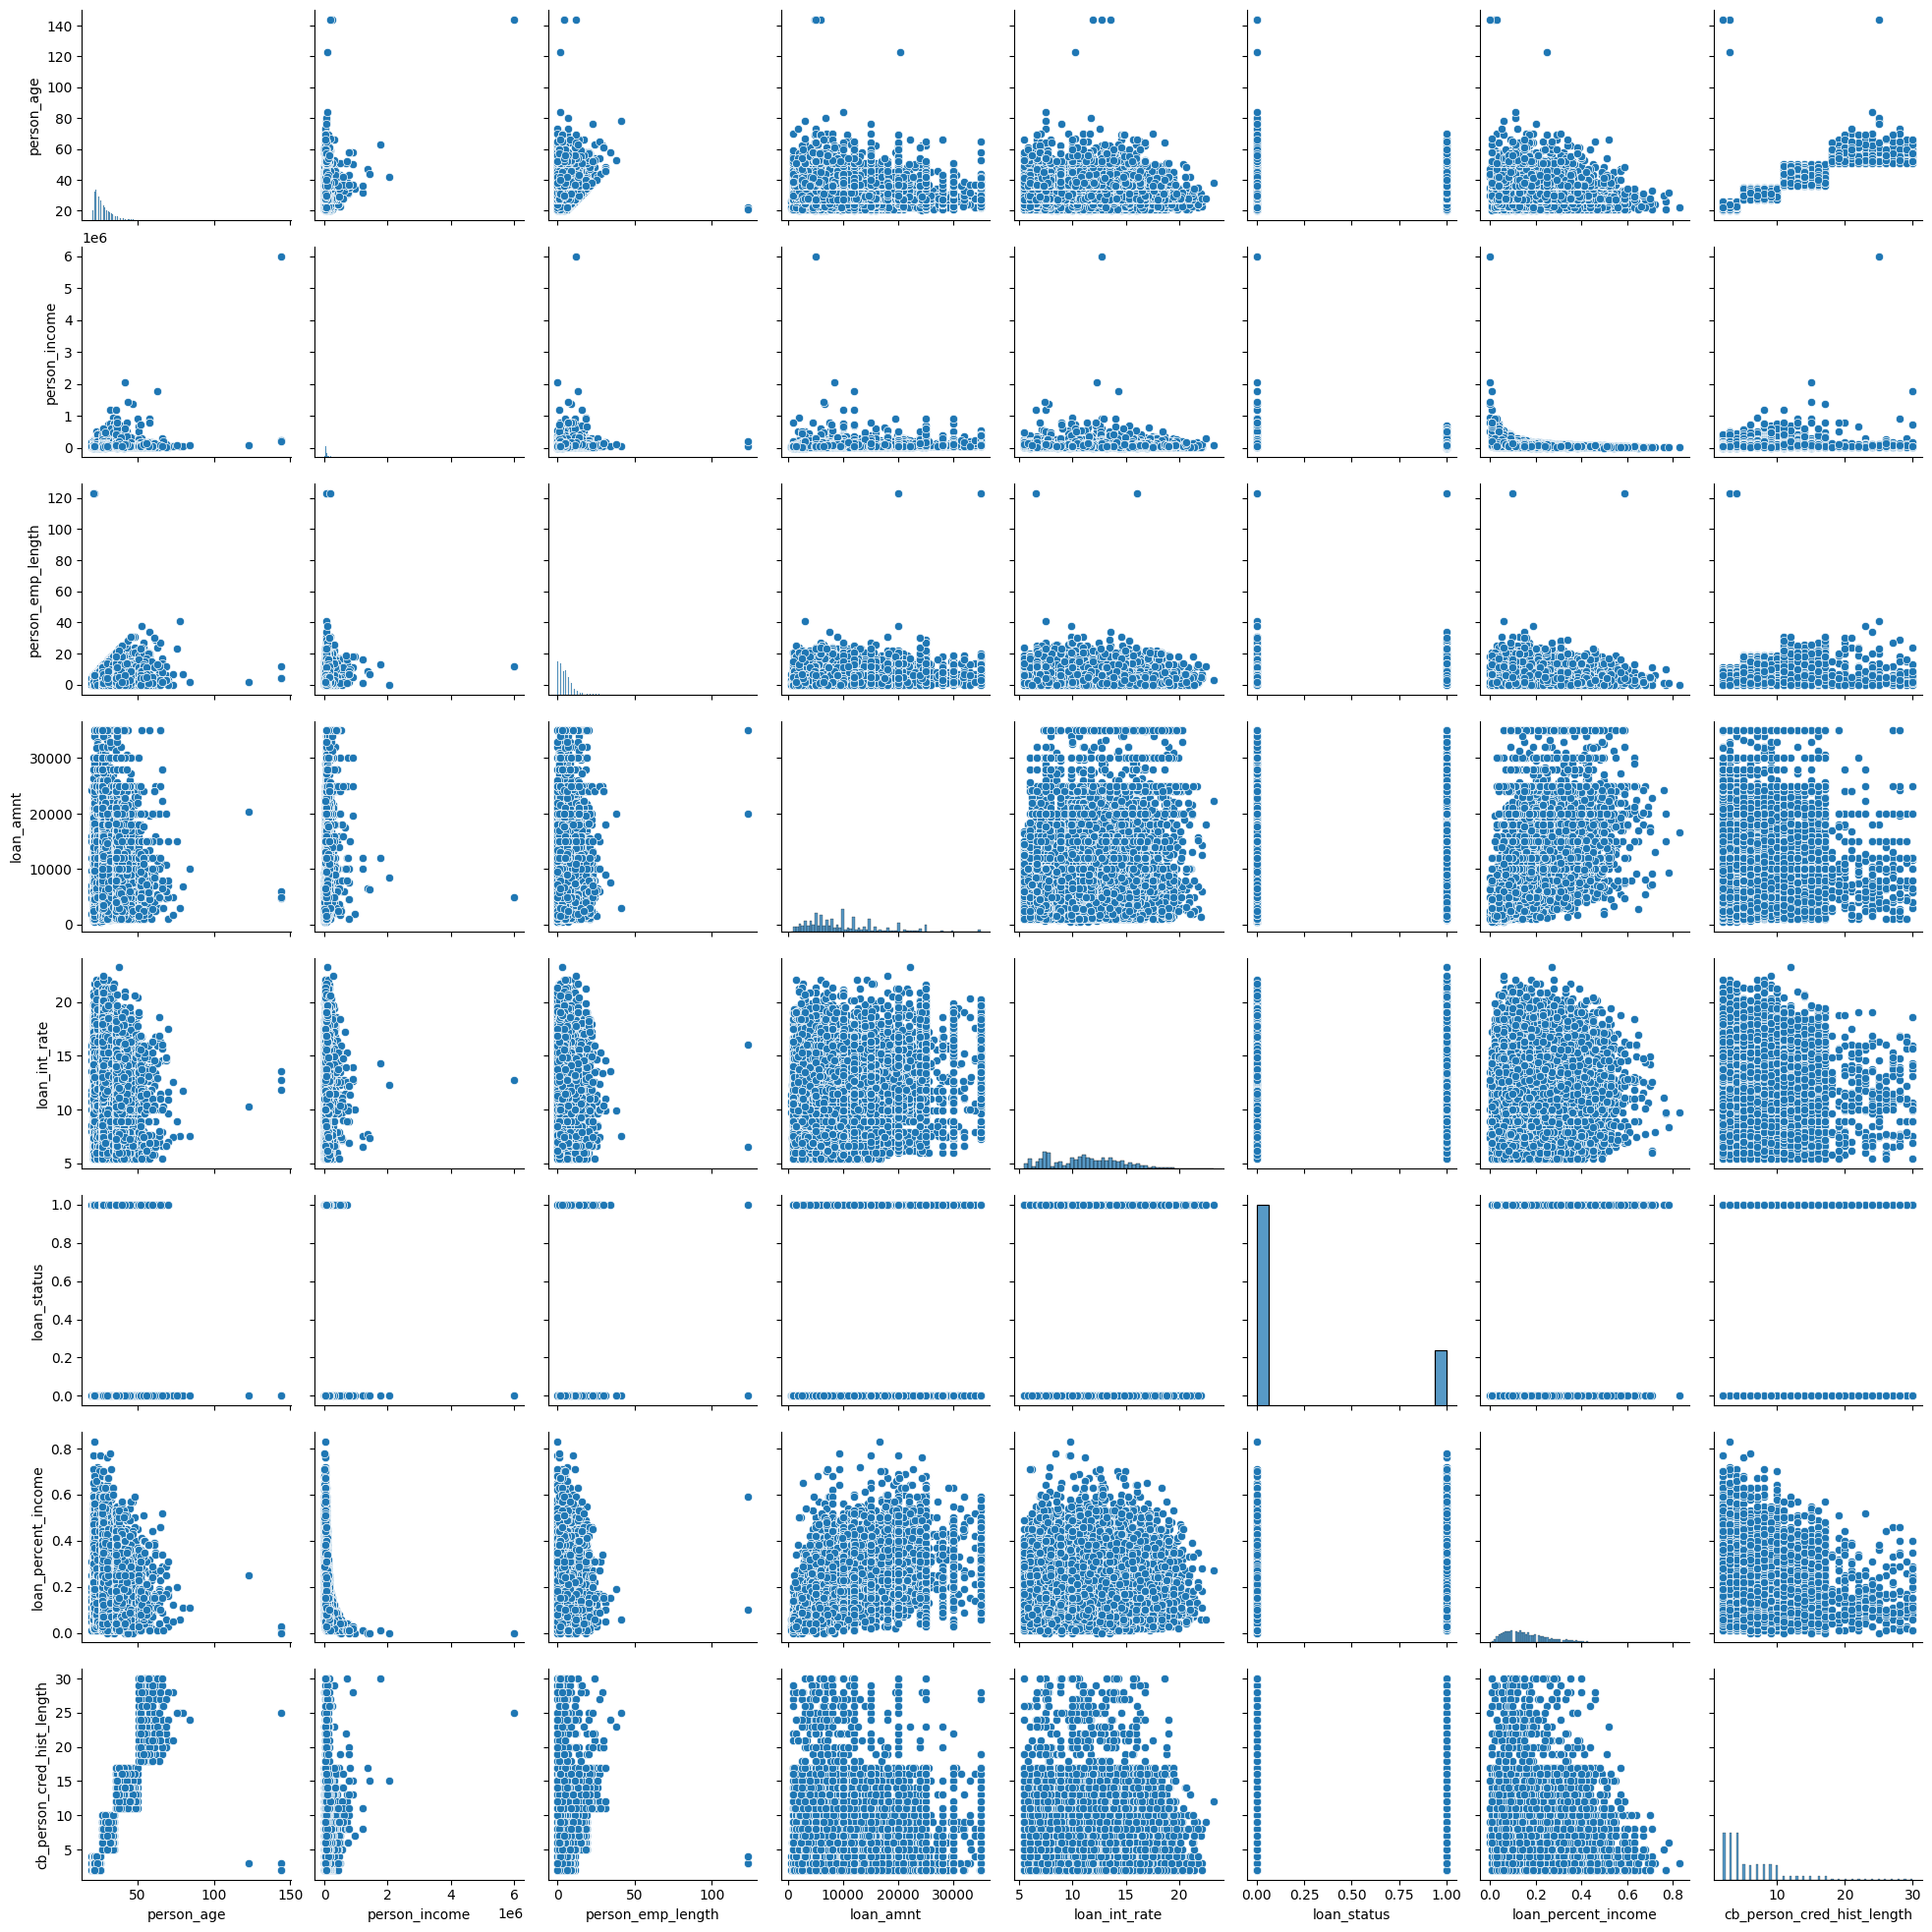

In [22]:
# bivariate analysis: numerical vs. numerical
sns.pairplot(data[numerical_features])
plt.show
# note: need to expand on this

                            person_age  person_income  person_emp_length  \
person_age                    1.000000       0.178899           0.165787   
person_income                 0.178899       1.000000           0.136825   
person_emp_length             0.165787       0.136825           1.000000   
loan_amnt                     0.054172       0.265879           0.110759   
loan_int_rate                 0.011019      -0.001381          -0.056405   
loan_status                  -0.023333      -0.139938          -0.082638   
loan_percent_income          -0.041065      -0.251511          -0.055167   
cb_person_cred_hist_length    0.859544       0.117076           0.146336   

                            loan_amnt  loan_int_rate  loan_status  \
person_age                   0.054172       0.011019    -0.023333   
person_income                0.265879      -0.001381    -0.139938   
person_emp_length            0.110759      -0.056405    -0.082638   
loan_amnt                    1.000000  

<function matplotlib.pyplot.show(close=None, block=None)>

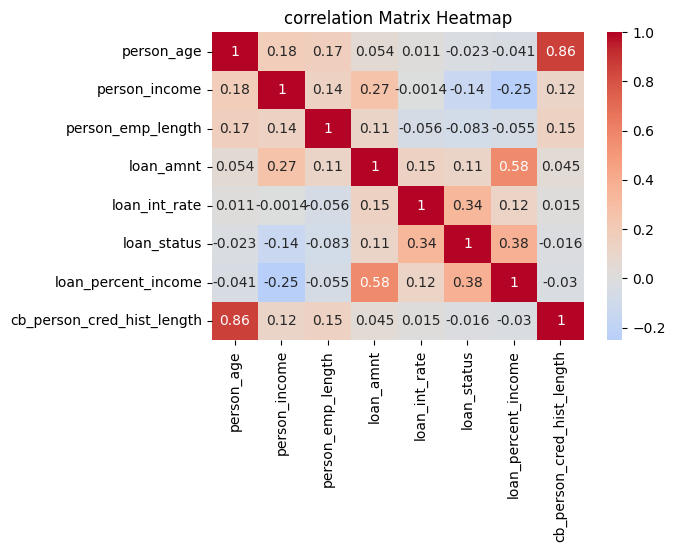

In [29]:
# correlation matrix
data_numerical = data[numerical_features]
correlation_matrix = data_numerical.corr()

# display the correlation matrix
print(correlation_matrix)

# visualize the correlation matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('correlation Matrix Heatmap')
plt.show